In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("appendicitis.csv", sep=',')
df.columns.values

array(['At1', ' At2', ' At3', ' At4', ' At5', ' At6', ' At7', 'Class'],
      dtype=object)

In [3]:
data = df.iloc[:,0:7]
labels = df.iloc[:,7].astype(str)

In [4]:
x = data.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df = pd.concat([df_scaled, labels], axis=1)
df

,0,1,2,3,4,5,6,Class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1
5,0.116,0.161,0.057,0.333,0.140,0.177,0.049,1
6,0.089,0.179,0.045,0.028,0.011,0.168,0.032,1
7,0.364,0.661,0.365,0.319,0.250,0.743,0.353,1
8,0.191,0.661,0.214,0.042,0.022,0.448,0.145,1
9,0.120,0.250,0.076,0.125,0.053,0.224,0.059,1


In [5]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           1       0.92      0.88      0.90        41
           0       0.64      0.75      0.69        12

   micro avg       0.85      0.85      0.85        53
   macro avg       0.78      0.81      0.80        53
weighted avg       0.86      0.85      0.85        53

accuracy:  0.8490566037735849


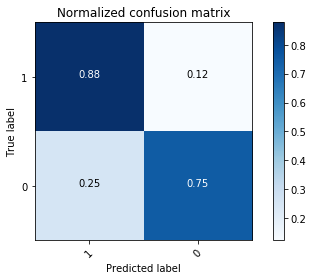

              precision    recall  f1-score   support

           1       0.90      0.86      0.88        44
           0       0.45      0.56      0.50         9

   micro avg       0.81      0.81      0.81        53
   macro avg       0.68      0.71      0.69        53
weighted avg       0.83      0.81      0.82        53

accuracy:  0.8113207547169812


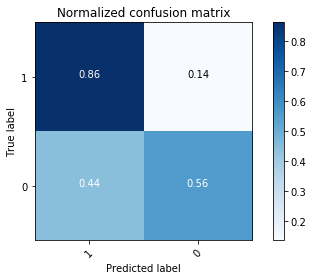

              precision    recall  f1-score   support

           1       0.92      0.75      0.83        44
           0       0.35      0.67      0.46         9

   micro avg       0.74      0.74      0.74        53
   macro avg       0.63      0.71      0.64        53
weighted avg       0.82      0.74      0.76        53

accuracy:  0.7358490566037735


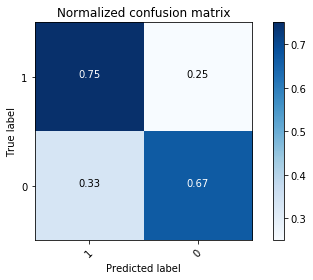

              precision    recall  f1-score   support

           1       0.87      0.83      0.85        41
           0       0.50      0.58      0.54        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.69      0.71      0.69        53
weighted avg       0.79      0.77      0.78        53

accuracy:  0.7735849056603774


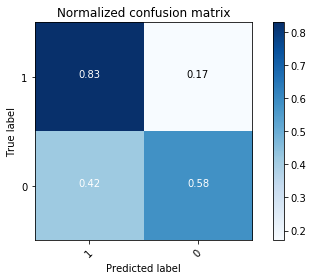

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        44
           0       0.50      0.22      0.31         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.68      0.59      0.61        53
weighted avg       0.80      0.83      0.80        53

accuracy:  0.8301886792452831


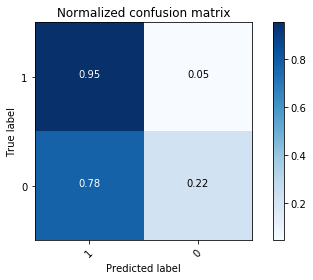

              precision    recall  f1-score   support

           1       0.97      0.76      0.85        41
           0       0.52      0.92      0.67        12

   micro avg       0.79      0.79      0.79        53
   macro avg       0.75      0.84      0.76        53
weighted avg       0.87      0.79      0.81        53

accuracy:  0.7924528301886793


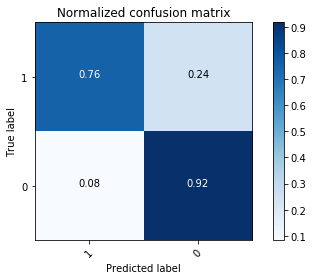

              precision    recall  f1-score   support

           1       0.93      0.84      0.88        44
           0       0.46      0.67      0.55         9

   micro avg       0.81      0.81      0.81        53
   macro avg       0.69      0.75      0.71        53
weighted avg       0.85      0.81      0.82        53

accuracy:  0.8113207547169812


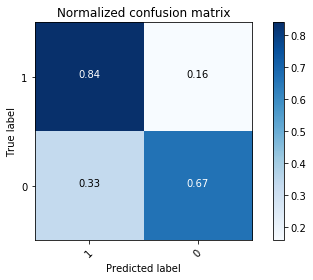

              precision    recall  f1-score   support

           1       0.84      0.90      0.87        41
           0       0.56      0.42      0.48        12

   micro avg       0.79      0.79      0.79        53
   macro avg       0.70      0.66      0.67        53
weighted avg       0.78      0.79      0.78        53

accuracy:  0.7924528301886793


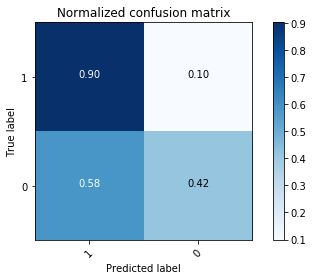

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        41
           0       0.62      0.42      0.50        12

   micro avg       0.81      0.81      0.81        53
   macro avg       0.73      0.67      0.69        53
weighted avg       0.79      0.81      0.80        53

accuracy:  0.8113207547169812


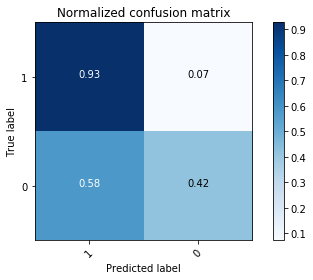

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        44
           0       0.44      0.44      0.44         9

   micro avg       0.81      0.81      0.81        53
   macro avg       0.67      0.67      0.67        53
weighted avg       0.81      0.81      0.81        53

accuracy:  0.8113207547169812


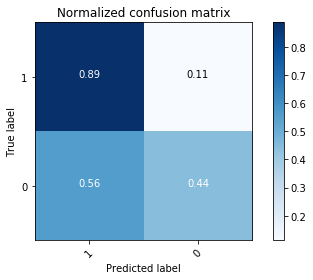

In [7]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.95      0.91      0.93        45
           0       0.60      0.75      0.67         8

   micro avg       0.89      0.89      0.89        53
   macro avg       0.78      0.83      0.80        53
weighted avg       0.90      0.89      0.89        53

accuracy:  0.8867924528301887


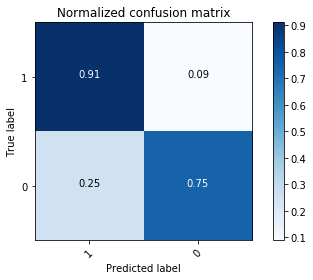

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        40
           0       1.00      0.38      0.56        13

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.69      0.73        53
weighted avg       0.87      0.85      0.82        53

accuracy:  0.8490566037735849


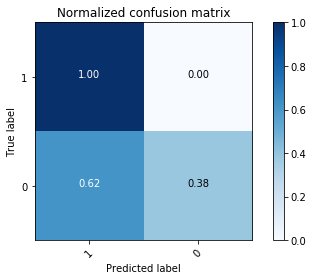

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        46
           0       0.57      0.57      0.57         7

   micro avg       0.89      0.89      0.89        53
   macro avg       0.75      0.75      0.75        53
weighted avg       0.89      0.89      0.89        53

accuracy:  0.8867924528301887


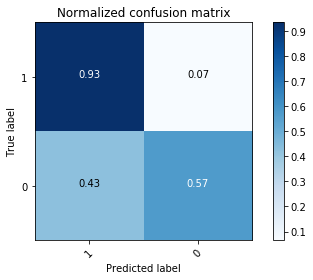

              precision    recall  f1-score   support

           1       0.88      0.90      0.89        39
           0       0.69      0.64      0.67        14

   micro avg       0.83      0.83      0.83        53
   macro avg       0.78      0.77      0.78        53
weighted avg       0.83      0.83      0.83        53

accuracy:  0.8301886792452831


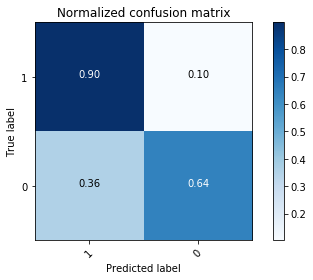

              precision    recall  f1-score   support

           1       0.93      0.91      0.92        43
           0       0.64      0.70      0.67        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.78      0.80      0.79        53
weighted avg       0.87      0.87      0.87        53

accuracy:  0.8679245283018868


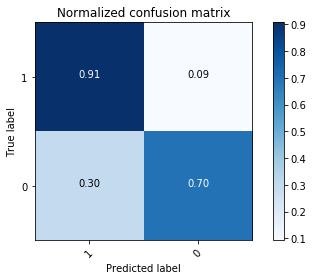

              precision    recall  f1-score   support

           1       0.87      0.95      0.91        42
           0       0.71      0.45      0.56        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.79      0.70      0.73        53
weighted avg       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


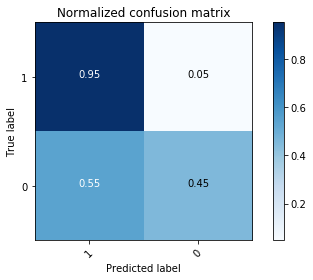

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        45
           0       0.57      0.50      0.53         8

   micro avg       0.87      0.87      0.87        53
   macro avg       0.74      0.72      0.73        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


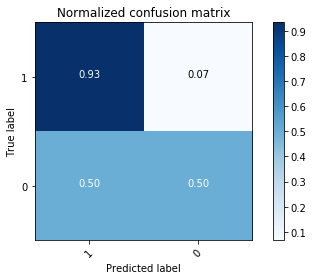

              precision    recall  f1-score   support

           1       0.84      0.95      0.89        40
           0       0.75      0.46      0.57        13

   micro avg       0.83      0.83      0.83        53
   macro avg       0.80      0.71      0.73        53
weighted avg       0.82      0.83      0.81        53

accuracy:  0.8301886792452831


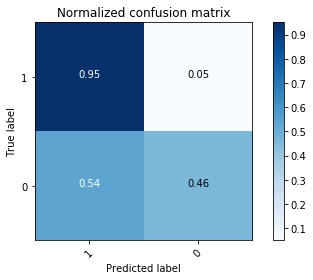

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        42
           0       0.70      0.64      0.67        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.80      0.78      0.79        53
weighted avg       0.86      0.87      0.87        53

accuracy:  0.8679245283018868


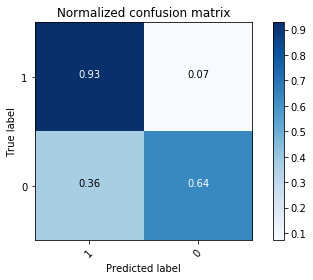

              precision    recall  f1-score   support

           1       0.88      0.98      0.92        43
           0       0.80      0.40      0.53        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.84      0.69      0.73        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


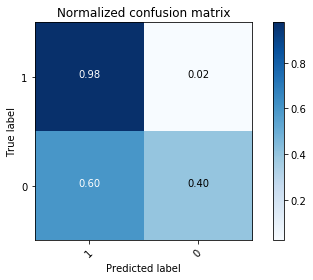

In [8]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        41
           0       1.00      0.50      0.67        12

   micro avg       0.89      0.89      0.89        53
   macro avg       0.94      0.75      0.80        53
weighted avg       0.90      0.89      0.87        53

accuracy:  0.8867924528301887


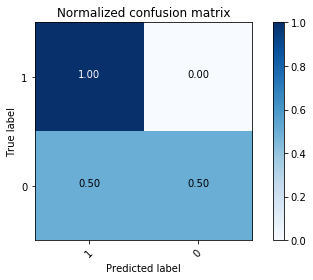

              precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           0       0.67      0.44      0.53         9

   micro avg       0.87      0.87      0.87        53
   macro avg       0.78      0.70      0.73        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


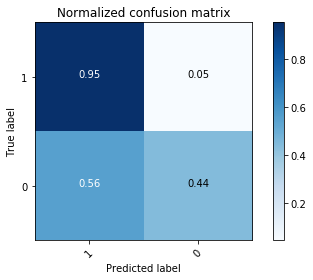

              precision    recall  f1-score   support

           1       0.86      0.98      0.91        44
           0       0.67      0.22      0.33         9

   micro avg       0.85      0.85      0.85        53
   macro avg       0.76      0.60      0.62        53
weighted avg       0.83      0.85      0.82        53

accuracy:  0.8490566037735849


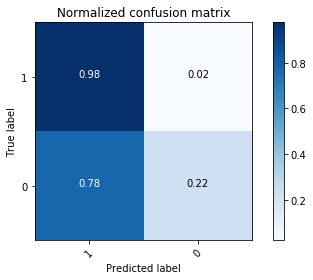

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


/home/valia/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


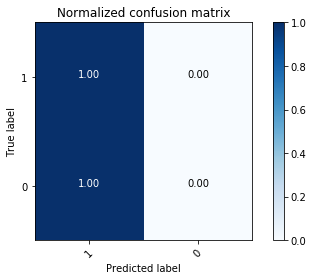

              precision    recall  f1-score   support

           1       0.92      0.94      0.93        47
           0       0.40      0.33      0.36         6

   micro avg       0.87      0.87      0.87        53
   macro avg       0.66      0.63      0.64        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


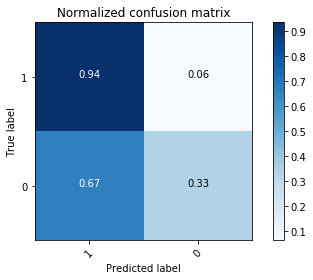

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           0       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


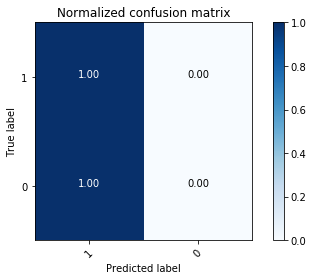

              precision    recall  f1-score   support

           1       0.93      0.95      0.94        43
           0       0.78      0.70      0.74        10

   micro avg       0.91      0.91      0.91        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.90      0.91      0.90        53

accuracy:  0.9056603773584906


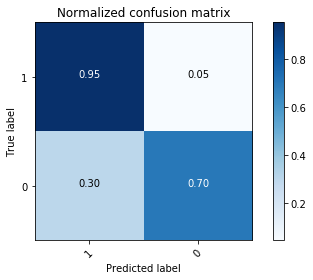

              precision    recall  f1-score   support

           1       0.83      0.95      0.89        42
           0       0.60      0.27      0.37        11

   micro avg       0.81      0.81      0.81        53
   macro avg       0.72      0.61      0.63        53
weighted avg       0.78      0.81      0.78        53

accuracy:  0.8113207547169812


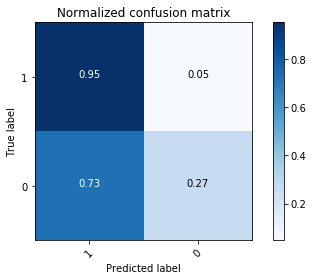

              precision    recall  f1-score   support

           1       0.81      0.97      0.89        40
           0       0.80      0.31      0.44        13

   micro avg       0.81      0.81      0.81        53
   macro avg       0.81      0.64      0.67        53
weighted avg       0.81      0.81      0.78        53

accuracy:  0.8113207547169812


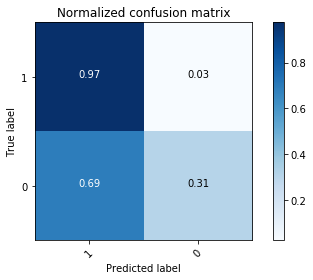

              precision    recall  f1-score   support

           1       0.96      0.98      0.97        45
           0       0.86      0.75      0.80         8

   micro avg       0.94      0.94      0.94        53
   macro avg       0.91      0.86      0.88        53
weighted avg       0.94      0.94      0.94        53

accuracy:  0.9433962264150944


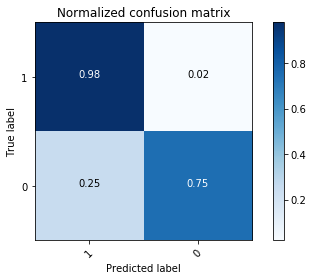

In [9]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.87      0.95      0.91        43
           0       0.67      0.40      0.50        10

   micro avg       0.85      0.85      0.85        53
   macro avg       0.77      0.68      0.71        53
weighted avg       0.83      0.85      0.83        53

accuracy:  0.8490566037735849


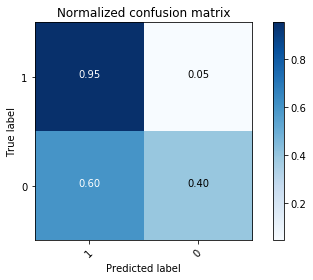

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


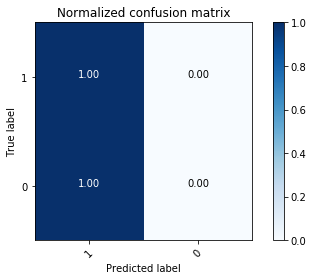

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


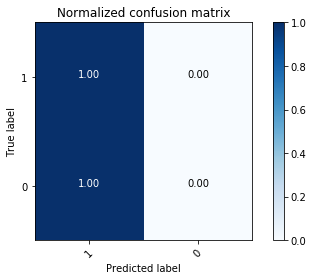

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        42
           0       1.00      0.36      0.53        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.68      0.73        53
weighted avg       0.89      0.87      0.84        53

accuracy:  0.8679245283018868


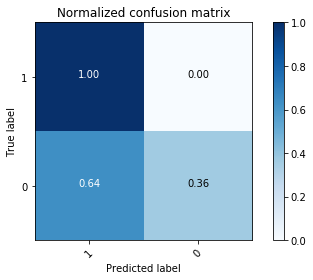

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        43
           0       1.00      0.10      0.18        10

   micro avg       0.83      0.83      0.83        53
   macro avg       0.91      0.55      0.54        53
weighted avg       0.86      0.83      0.77        53

accuracy:  0.8301886792452831


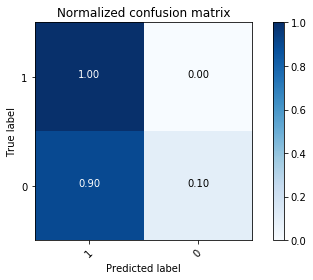

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.89      0.98      0.93        42
           0       0.86      0.55      0.67        11

   micro avg       0.89      0.89      0.89        53
   macro avg       0.87      0.76      0.80        53
weighted avg       0.88      0.89      0.88        53

accuracy:  0.8867924528301887


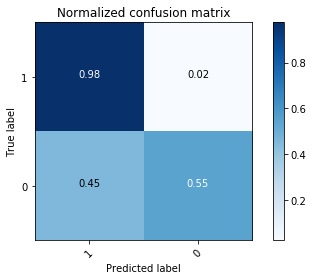

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


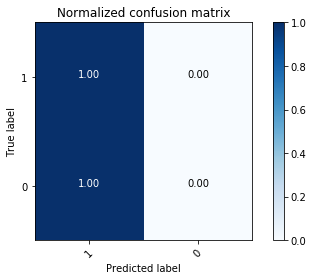

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.89      0.93      0.91        43
           0       0.62      0.50      0.56        10

   micro avg       0.85      0.85      0.85        53
   macro avg       0.76      0.72      0.73        53
weighted avg       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


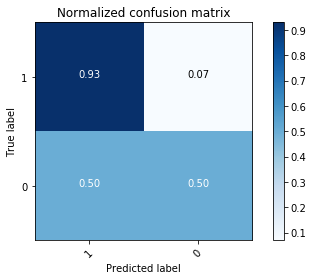

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.84      0.98      0.90        42
           0       0.75      0.27      0.40        11

   micro avg       0.83      0.83      0.83        53
   macro avg       0.79      0.62      0.65        53
weighted avg       0.82      0.83      0.80        53

accuracy:  0.8301886792452831


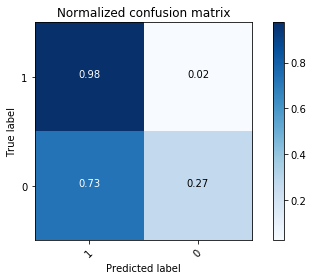

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        43
           0       1.00      0.30      0.46        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.65      0.69        53
weighted avg       0.89      0.87      0.84        53

accuracy:  0.8679245283018868


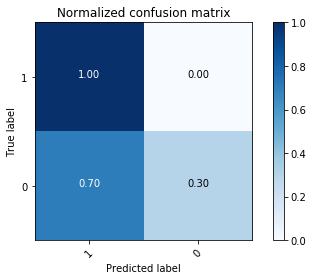

In [10]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


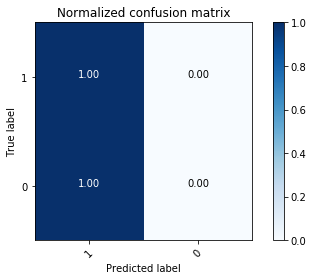

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


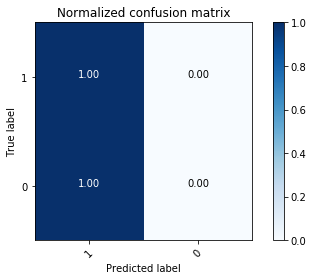

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


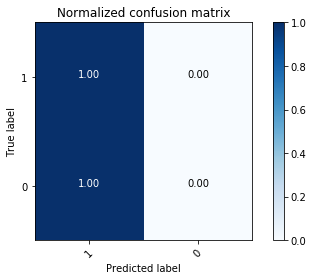

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


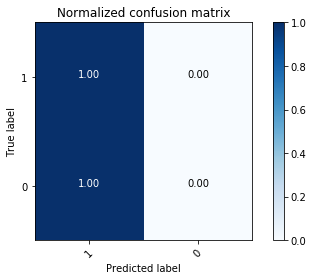

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


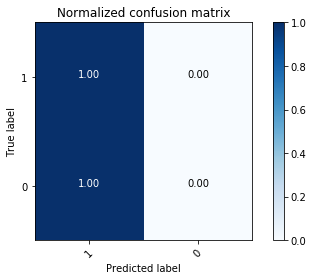

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


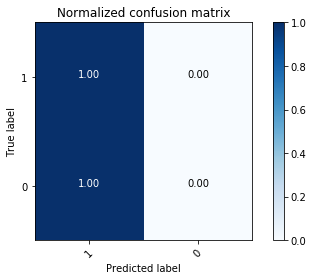

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        44
           0       1.00      0.11      0.20         9

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.56      0.56        53
weighted avg       0.87      0.85      0.79        53

accuracy:  0.8490566037735849


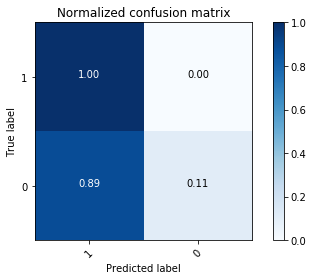

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


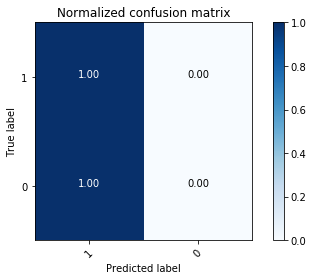

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


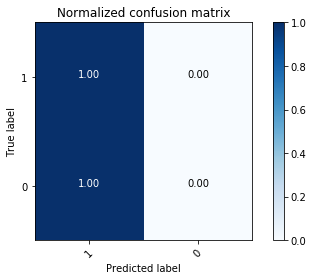

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


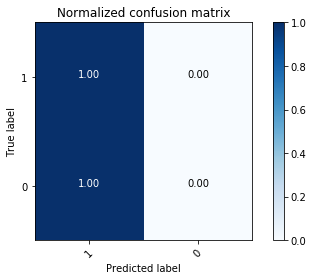

In [11]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


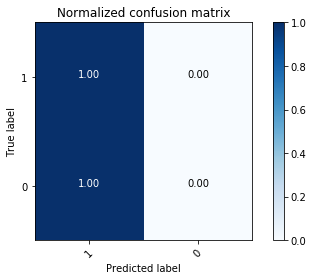

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


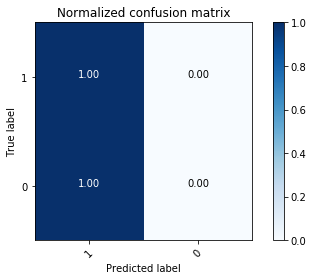

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


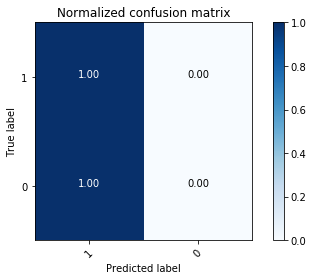

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


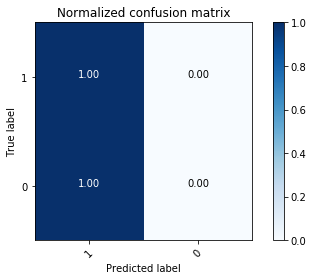

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


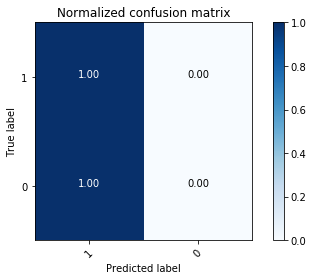

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


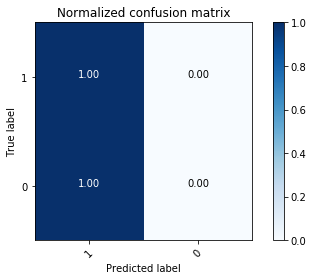

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


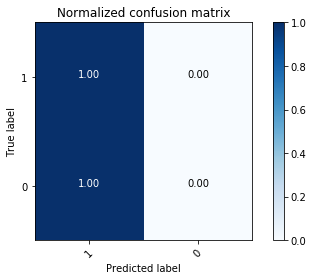

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


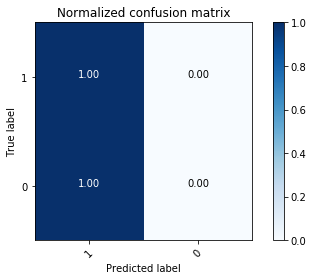

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        46
           0       0.00      0.00      0.00         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53

accuracy:  0.8679245283018868


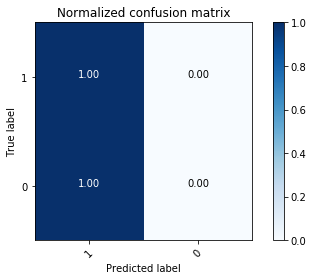

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


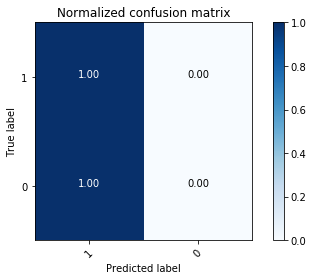

In [12]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


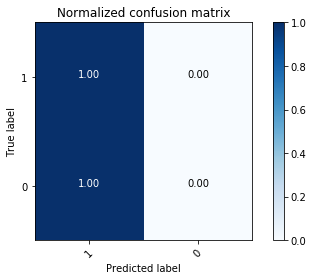

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


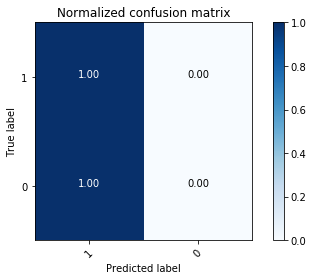

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


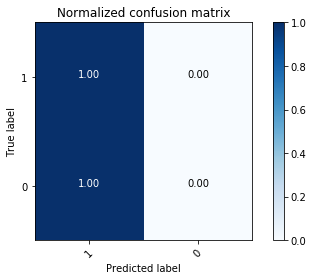

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


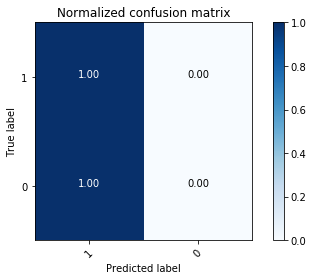

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


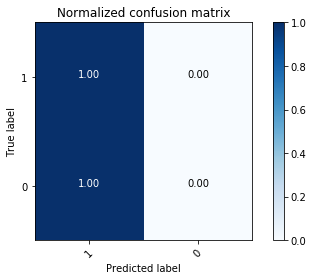

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


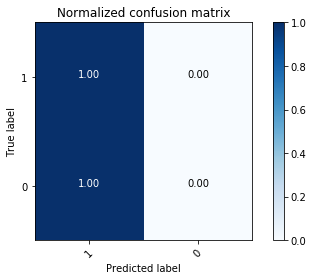

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


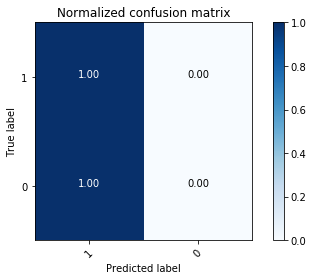

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


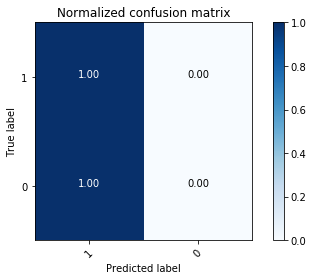

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


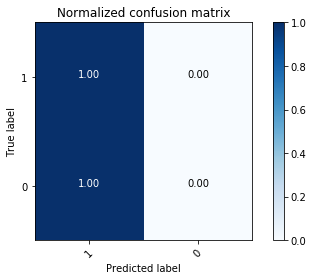

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


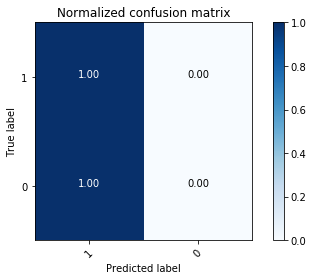

In [13]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        43
           0       0.44      0.70      0.54        10

   micro avg       0.77      0.77      0.77        53
   macro avg       0.68      0.75      0.69        53
weighted avg       0.83      0.77      0.79        53

accuracy:  0.7735849056603774


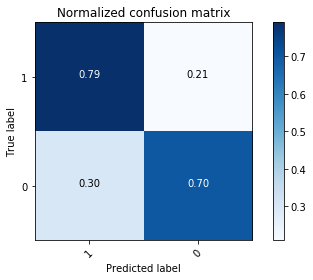

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        42
           0       0.55      0.55      0.55        11

   micro avg       0.81      0.81      0.81        53
   macro avg       0.71      0.71      0.71        53
weighted avg       0.81      0.81      0.81        53

accuracy:  0.8113207547169812


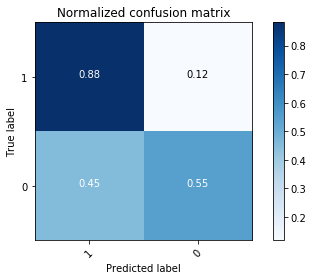

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.93      0.84      0.88        44
           0       0.46      0.67      0.55         9

   micro avg       0.81      0.81      0.81        53
   macro avg       0.69      0.75      0.71        53
weighted avg       0.85      0.81      0.82        53

accuracy:  0.8113207547169812


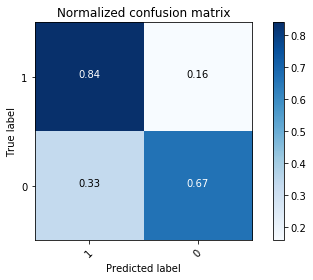

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.85      0.83      0.84        41
           0       0.46      0.50      0.48        12

   micro avg       0.75      0.75      0.75        53
   macro avg       0.66      0.66      0.66        53
weighted avg       0.76      0.75      0.76        53

accuracy:  0.7547169811320755


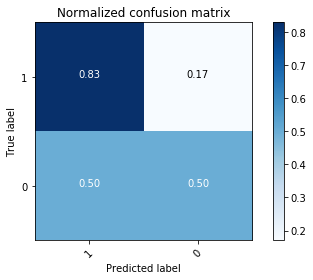

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.95      0.89      0.92        45
           0       0.55      0.75      0.63         8

   micro avg       0.87      0.87      0.87        53
   macro avg       0.75      0.82      0.78        53
weighted avg       0.89      0.87      0.88        53

accuracy:  0.8679245283018868


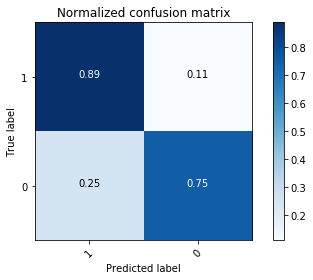

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.87      0.85      0.86        40
           0       0.57      0.62      0.59        13

   micro avg       0.79      0.79      0.79        53
   macro avg       0.72      0.73      0.73        53
weighted avg       0.80      0.79      0.79        53

accuracy:  0.7924528301886793


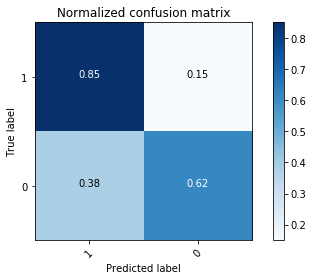

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.89      0.91      0.90        44
           0       0.50      0.44      0.47         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.69      0.68      0.68        53
weighted avg       0.82      0.83      0.83        53

accuracy:  0.8301886792452831


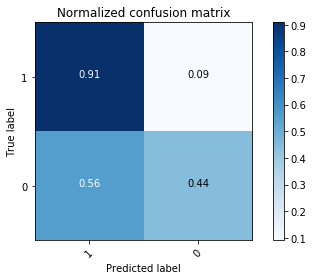

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.86      0.93      0.89        41
           0       0.67      0.50      0.57        12

   micro avg       0.83      0.83      0.83        53
   macro avg       0.77      0.71      0.73        53
weighted avg       0.82      0.83      0.82        53

accuracy:  0.8301886792452831


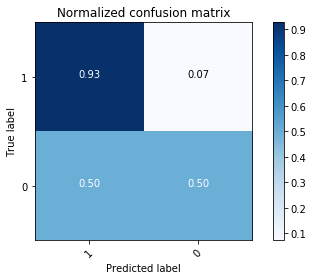

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        42
           0       0.56      0.45      0.50        11

   micro avg       0.81      0.81      0.81        53
   macro avg       0.71      0.68      0.69        53
weighted avg       0.80      0.81      0.80        53

accuracy:  0.8113207547169812


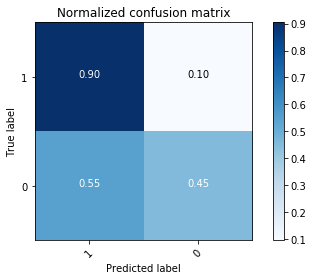

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.92      0.77      0.84        43
           0       0.41      0.70      0.52        10

   micro avg       0.75      0.75      0.75        53
   macro avg       0.66      0.73      0.68        53
weighted avg       0.82      0.75      0.78        53

accuracy:  0.7547169811320755


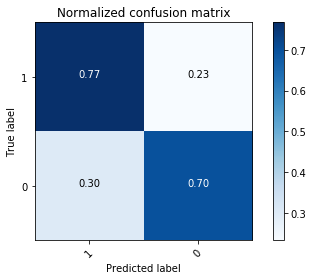

In [14]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        43
           0       0.60      0.60      0.60        10

   micro avg       0.85      0.85      0.85        53
   macro avg       0.75      0.75      0.75        53
weighted avg       0.85      0.85      0.85        53

accuracy:  0.8490566037735849


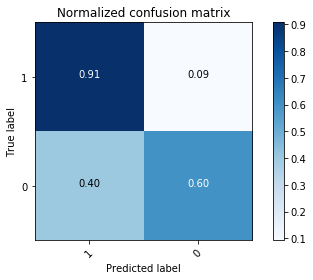

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.87      0.98      0.92        42
           0       0.83      0.45      0.59        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.85      0.72      0.75        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


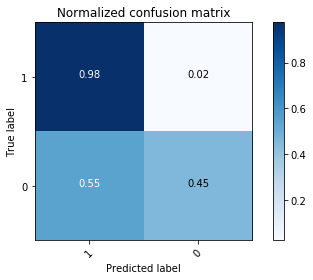

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.98      0.91      0.95        47
           0       0.56      0.83      0.67         6

   micro avg       0.91      0.91      0.91        53
   macro avg       0.77      0.87      0.81        53
weighted avg       0.93      0.91      0.91        53

accuracy:  0.9056603773584906


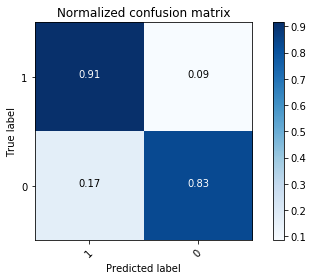

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.82      0.95      0.88        38
           0       0.78      0.47      0.58        15

   micro avg       0.81      0.81      0.81        53
   macro avg       0.80      0.71      0.73        53
weighted avg       0.81      0.81      0.79        53

accuracy:  0.8113207547169812


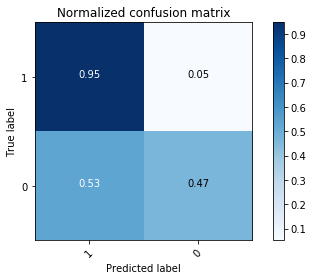

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        45
           0       0.75      0.75      0.75         8

   micro avg       0.92      0.92      0.92        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.92      0.92      0.92        53

accuracy:  0.9245283018867925


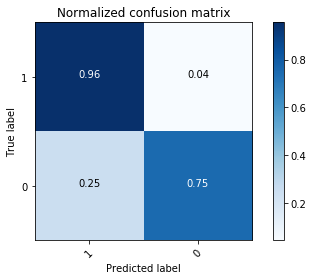

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.84      0.95      0.89        40
           0       0.75      0.46      0.57        13

   micro avg       0.83      0.83      0.83        53
   macro avg       0.80      0.71      0.73        53
weighted avg       0.82      0.83      0.81        53

accuracy:  0.8301886792452831


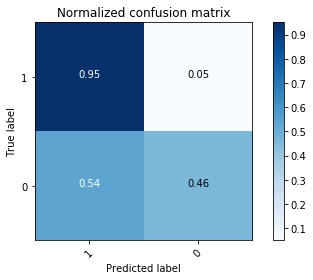

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.75      1.00      0.85        38
           0       1.00      0.13      0.24        15

   micro avg       0.75      0.75      0.75        53
   macro avg       0.87      0.57      0.54        53
weighted avg       0.82      0.75      0.68        53

accuracy:  0.7547169811320755


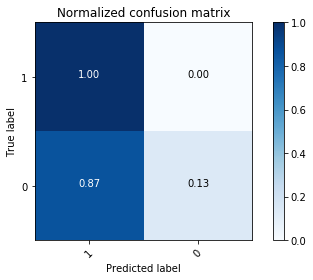

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.95      0.85      0.90        47
           0       0.36      0.67      0.47         6

   micro avg       0.83      0.83      0.83        53
   macro avg       0.66      0.76      0.68        53
weighted avg       0.89      0.83      0.85        53

accuracy:  0.8301886792452831


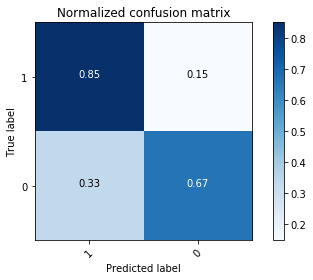

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        42
           0       0.62      0.45      0.53        11

   micro avg       0.83      0.83      0.83        53
   macro avg       0.75      0.69      0.71        53
weighted avg       0.82      0.83      0.82        53

accuracy:  0.8301886792452831


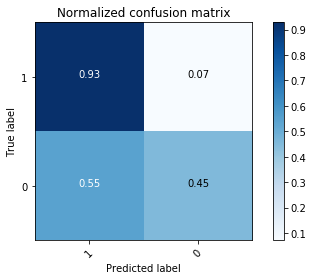

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.93      0.91      0.92        43
           0       0.64      0.70      0.67        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.78      0.80      0.79        53
weighted avg       0.87      0.87      0.87        53

accuracy:  0.8679245283018868


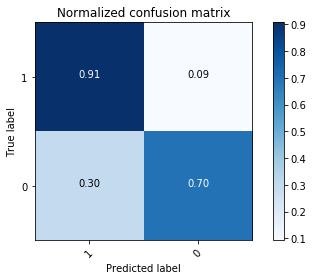

In [15]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.84      1.00      0.91        42
           0       1.00      0.27      0.43        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.64      0.67        53
weighted avg       0.87      0.85      0.81        53

accuracy:  0.8490566037735849


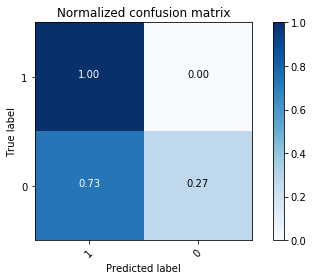

              precision    recall  f1-score   support

           1       0.88      0.98      0.92        43
           0       0.80      0.40      0.53        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.84      0.69      0.73        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


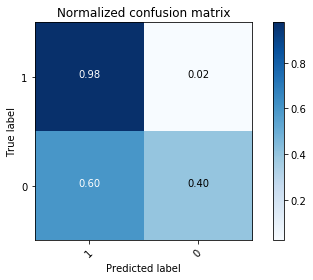

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        46
           0       0.71      0.71      0.71         7

   micro avg       0.92      0.92      0.92        53
   macro avg       0.84      0.84      0.84        53
weighted avg       0.92      0.92      0.92        53

accuracy:  0.9245283018867925


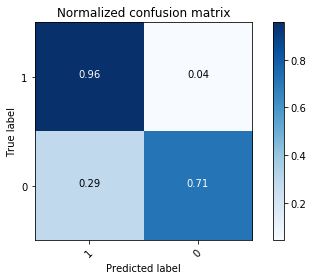

              precision    recall  f1-score   support

           1       0.83      0.97      0.89        39
           0       0.86      0.43      0.57        14

   micro avg       0.83      0.83      0.83        53
   macro avg       0.84      0.70      0.73        53
weighted avg       0.83      0.83      0.81        53

accuracy:  0.8301886792452831


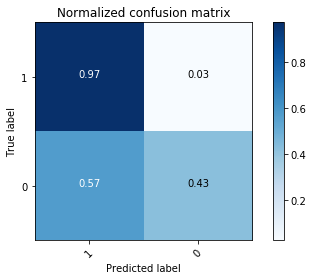

              precision    recall  f1-score   support

           1       0.87      0.98      0.92        42
           0       0.83      0.45      0.59        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.85      0.72      0.75        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


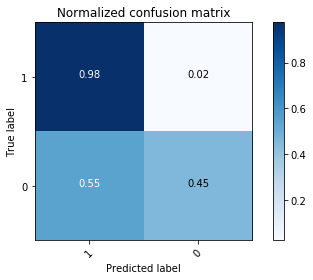

              precision    recall  f1-score   support

           1       0.89      0.95      0.92        43
           0       0.71      0.50      0.59        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.80      0.73      0.75        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


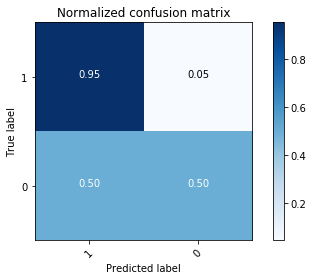

              precision    recall  f1-score   support

           1       0.88      0.98      0.92        43
           0       0.80      0.40      0.53        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.84      0.69      0.73        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


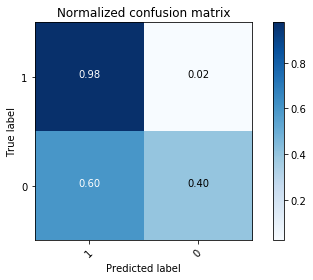

              precision    recall  f1-score   support

           1       0.87      0.98      0.92        42
           0       0.83      0.45      0.59        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.85      0.72      0.75        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


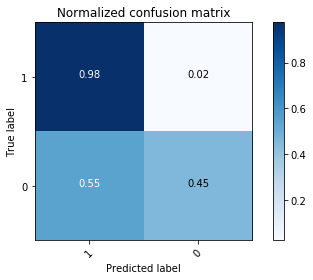

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


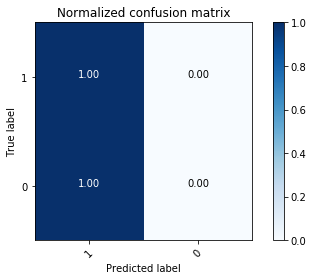

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        46
           0       0.50      0.43      0.46         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.71      0.68      0.69        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


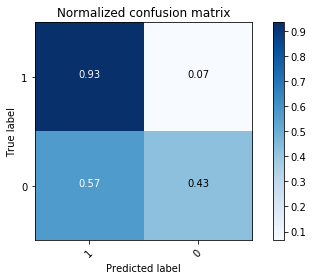

In [16]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.83      0.98      0.90        41
           0       0.80      0.33      0.47        12

   micro avg       0.83      0.83      0.83        53
   macro avg       0.82      0.65      0.68        53
weighted avg       0.83      0.83      0.80        53

accuracy:  0.8301886792452831


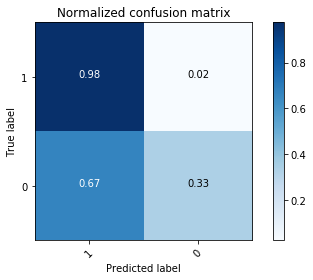

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.84      0.98      0.91        44
           0       0.50      0.11      0.18         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.67      0.54      0.54        53
weighted avg       0.78      0.83      0.78        53

accuracy:  0.8301886792452831


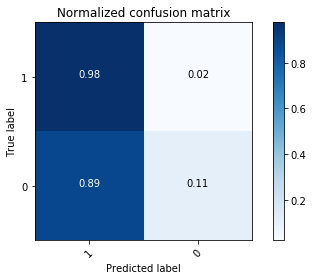

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.91      0.93      0.92        43
           0       0.67      0.60      0.63        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.79      0.77      0.78        53
weighted avg       0.86      0.87      0.87        53

accuracy:  0.8679245283018868


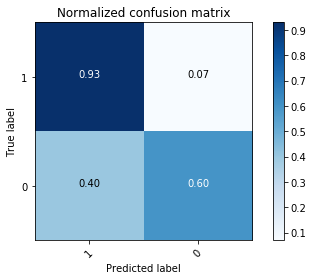

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        42
           0       1.00      0.36      0.53        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.68      0.73        53
weighted avg       0.89      0.87      0.84        53

accuracy:  0.8679245283018868


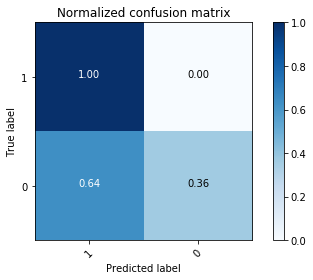

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.81      1.00      0.89        42
           0       1.00      0.09      0.17        11

   micro avg       0.81      0.81      0.81        53
   macro avg       0.90      0.55      0.53        53
weighted avg       0.85      0.81      0.74        53

accuracy:  0.8113207547169812


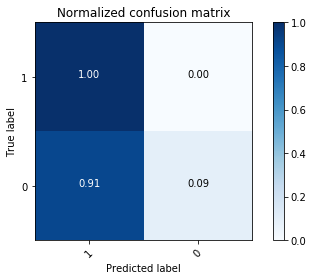

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        43
           0       1.00      0.40      0.57        10

   micro avg       0.89      0.89      0.89        53
   macro avg       0.94      0.70      0.75        53
weighted avg       0.90      0.89      0.87        53

accuracy:  0.8867924528301887


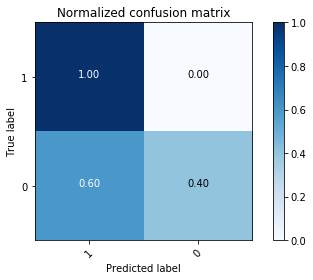

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.83      0.98      0.90        41
           0       0.80      0.33      0.47        12

   micro avg       0.83      0.83      0.83        53
   macro avg       0.82      0.65      0.68        53
weighted avg       0.83      0.83      0.80        53

accuracy:  0.8301886792452831


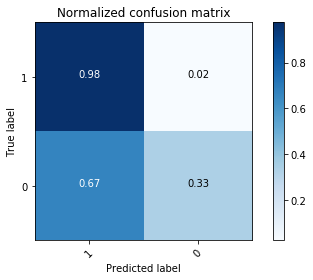

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.88      0.98      0.92        44
           0       0.75      0.33      0.46         9

   micro avg       0.87      0.87      0.87        53
   macro avg       0.81      0.66      0.69        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


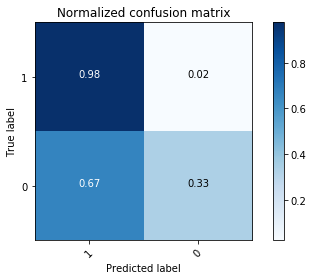

set(['1', '0'])
              precision    recall  f1-score   support

           1       0.85      0.91      0.88        43
           0       0.43      0.30      0.35        10

   micro avg       0.79      0.79      0.79        53
   macro avg       0.64      0.60      0.61        53
weighted avg       0.77      0.79      0.78        53

accuracy:  0.7924528301886793


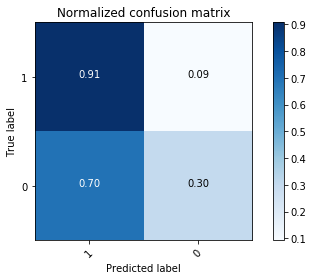

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


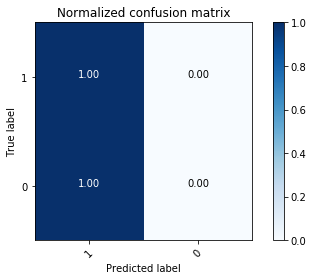

In [17]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


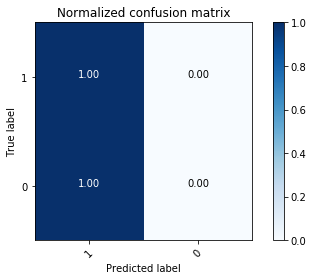

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


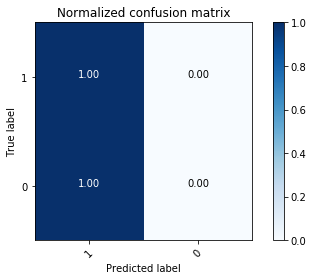

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


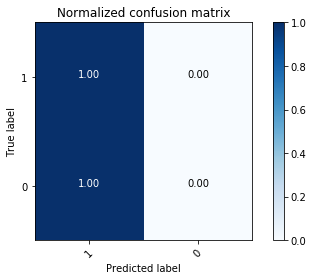

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        44
           0       1.00      0.11      0.20         9

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.56      0.56        53
weighted avg       0.87      0.85      0.79        53

accuracy:  0.8490566037735849


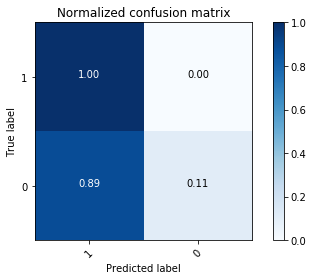

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        45
           0       1.00      0.12      0.22         8

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.56      0.58        53
weighted avg       0.89      0.87      0.82        53

accuracy:  0.8679245283018868


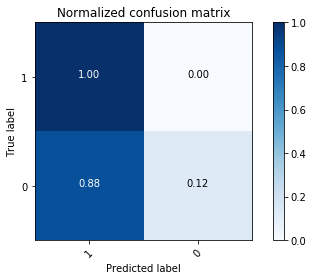

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


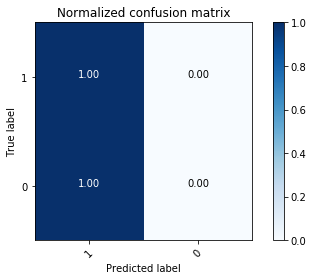

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


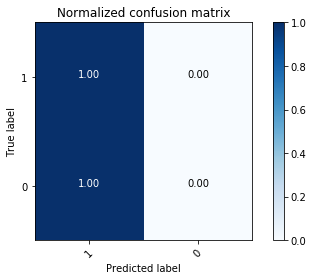

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


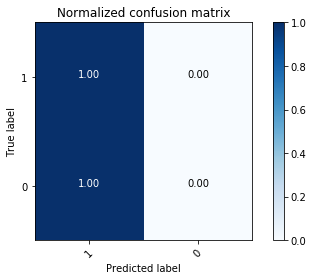

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


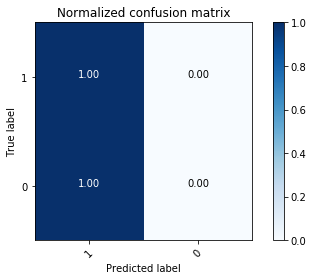

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


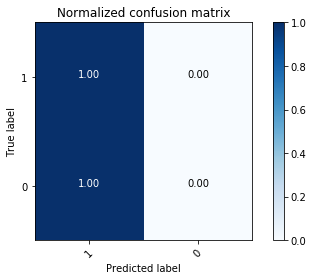

In [18]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        47
           0       0.00      0.00      0.00         6

   micro avg       0.89      0.89      0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53

accuracy:  0.8867924528301887


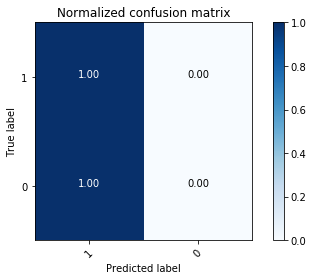

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           0       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


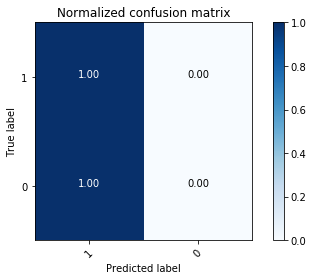

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        46
           0       0.00      0.00      0.00         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53

accuracy:  0.8679245283018868


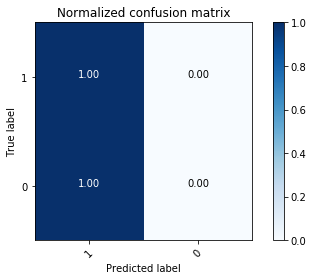

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


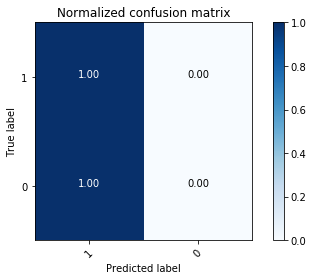

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        46
           0       0.00      0.00      0.00         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53

accuracy:  0.8679245283018868


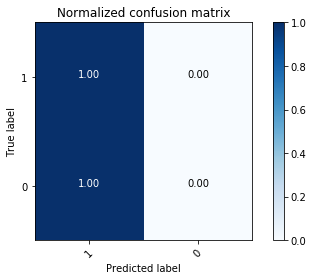

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


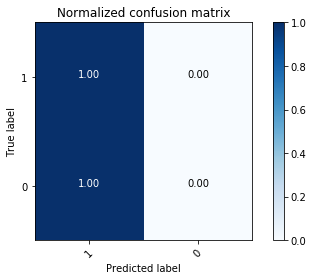

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        47
           0       0.00      0.00      0.00         6

   micro avg       0.89      0.89      0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53

accuracy:  0.8867924528301887


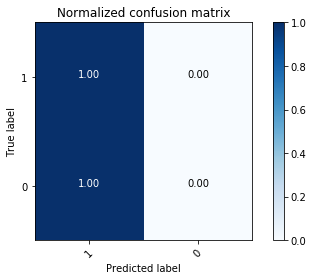

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           0       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


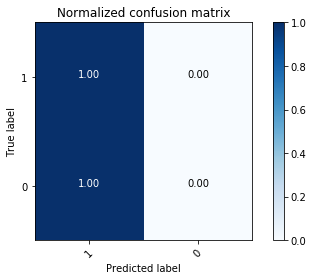

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        48
           0       0.00      0.00      0.00         5

   micro avg       0.91      0.91      0.91        53
   macro avg       0.45      0.50      0.48        53
weighted avg       0.82      0.91      0.86        53

accuracy:  0.9056603773584906


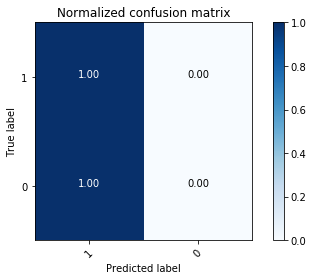

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        37
           0       0.00      0.00      0.00        16

   micro avg       0.70      0.70      0.70        53
   macro avg       0.35      0.50      0.41        53
weighted avg       0.49      0.70      0.57        53

accuracy:  0.6981132075471698


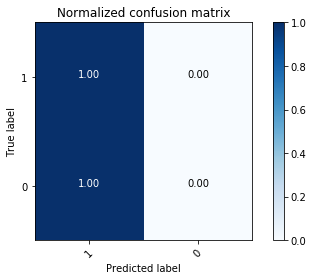

In [19]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


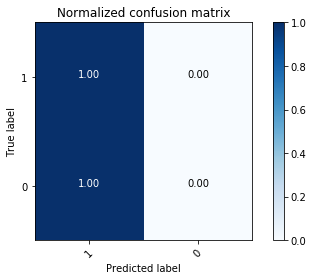

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


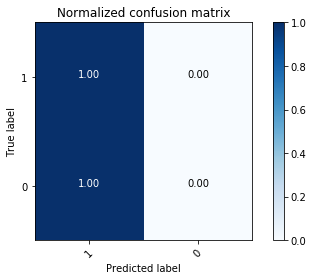

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


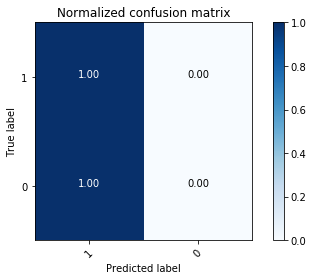

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


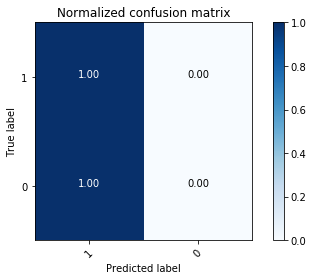

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


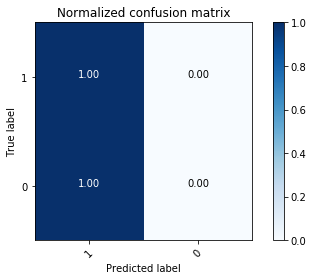

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


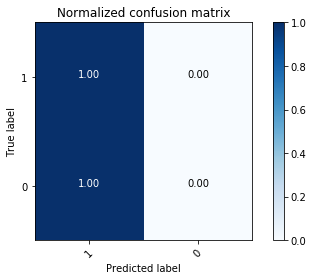

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


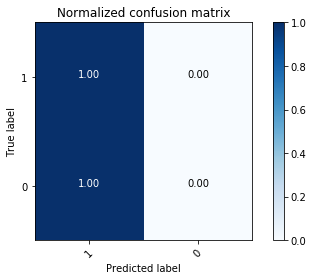

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


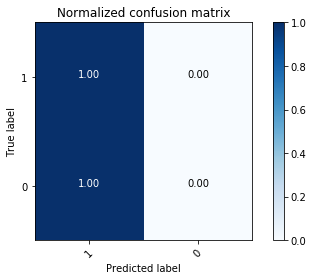

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        47
           0       0.00      0.00      0.00         6

   micro avg       0.89      0.89      0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53

accuracy:  0.8867924528301887


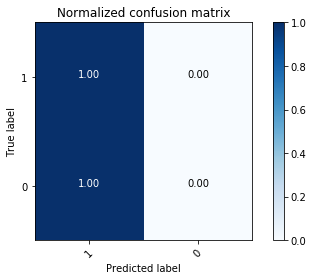

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           0       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


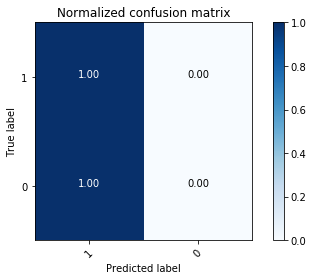

In [20]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [21]:
print acc


with open("accAppendicitisKNNWithoutNoiseNormalised.csv", 'wb') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)    

['Euclidean 1', 0.8490566037735849, 0.8113207547169812, 0.7358490566037735, 0.7735849056603774, 0.8301886792452831, 0.7924528301886793, 0.8113207547169812, 0.7924528301886793, 0.8113207547169812, 0.8113207547169812, 'Euclidean 5', 0.8867924528301887, 0.8490566037735849, 0.8867924528301887, 0.8301886792452831, 0.8679245283018868, 0.8490566037735849, 0.8679245283018868, 0.8301886792452831, 0.8679245283018868, 0.8679245283018868, 'Euclidean 10', 0.8867924528301887, 0.8679245283018868, 0.8490566037735849, 0.7735849056603774, 0.8679245283018868, 0.7169811320754716, 0.9056603773584906, 0.8113207547169812, 0.8113207547169812, 0.9433962264150944, 'Euclidean 15', 0.8490566037735849, 0.7924528301886793, 0.8113207547169812, 0.8679245283018868, 0.8301886792452831, 0.8867924528301887, 0.7924528301886793, 0.8490566037735849, 0.8301886792452831, 0.8679245283018868, 'Euclidean 20', 0.7924528301886793, 0.8113207547169812, 0.7924528301886793, 0.8113207547169812, 0.8113207547169812, 0.7924528301886793, 0